In [3]:
!pip install ultralytics

In [4]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')


image = cv2.imread("/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/train/images/1-1_jpg.rf.3c35c15f5361d33821647bfd181b0af7.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


# YOLOv8 configuration

100%|██████████| 6.25M/6.25M [00:00<00:00, 130MB/s]



image 1/1 /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/train/images/1-1_jpg.rf.3c35c15f5361d33821647bfd181b0af7.jpg: 640x640 1 person, 6.5ms
Speed: 15.4ms preprocess, 6.5ms inference, 282.6ms postprocess per image at shape (1, 3, 640, 640)


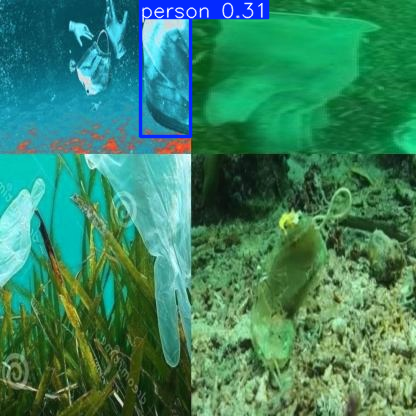

In [5]:
model = YOLO("yolov8n.pt") 

# Use the model to detect object
image = "/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/train/images/1-1_jpg.rf.3c35c15f5361d33821647bfd181b0af7.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

# Fine-tuning process log of YOLOv8

In [6]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.yaml').load('yolov8n.pt')  

# Training The Final Model
Result_Final_model = Final_model.train(data="/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/data.yaml",epochs=25, imgsz = 640, batch = 16 ,lr0=0.01, dropout= 0.15, device = 0)

Transferred 355/355 items from pretrained weights
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=yolov8n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, s

100%|██████████| 755k/755k [00:00<00:00, 27.9MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 108MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/train/labels... 3628 images, 2 backgrounds, 0 corrupt: 100%|██████████| 3628/3628 [00:13<00:00, 269.64it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/valid/labels... 1001 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1001/1001 [00:03<00:00, 255.90it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      2.44G      1.462      3.368      1.621         37        640: 100%|██████████| 227/227 [00:45<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.37it/s]


                   all       1001       1891      0.652      0.179      0.186      0.118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.34G      1.442      2.562      1.597         40        640: 100%|██████████| 227/227 [00:42<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.45it/s]


                   all       1001       1891      0.651      0.212      0.234      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      2.35G      1.445      2.309      1.573         68        640: 100%|██████████| 227/227 [00:41<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.49it/s]


                   all       1001       1891      0.558      0.233       0.22      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.34G      1.434      2.149       1.56         52        640: 100%|██████████| 227/227 [00:41<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.50it/s]


                   all       1001       1891      0.576      0.303      0.285      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      2.34G      1.409       2.03      1.544         36        640: 100%|██████████| 227/227 [00:41<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.54it/s]


                   all       1001       1891      0.681      0.297      0.324      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.34G      1.399       1.92      1.528         63        640: 100%|██████████| 227/227 [00:41<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.55it/s]

                   all       1001       1891      0.718      0.313      0.314      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.46G      1.348      1.777       1.49         57        640: 100%|██████████| 227/227 [00:41<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.48it/s]

                   all       1001       1891      0.778      0.339      0.378      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      2.46G      1.331      1.723      1.474         59        640: 100%|██████████| 227/227 [00:41<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.70it/s]

                   all       1001       1891      0.623      0.337      0.357      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.34G      1.319      1.657      1.469         90        640: 100%|██████████| 227/227 [00:41<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.53it/s]

                   all       1001       1891      0.673      0.362      0.382      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      2.34G      1.309      1.587      1.453         56        640: 100%|██████████| 227/227 [00:42<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.55it/s]

                   all       1001       1891      0.673      0.335      0.384      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25       2.4G      1.266      1.527      1.433         34        640: 100%|██████████| 227/227 [00:41<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.55it/s]

                   all       1001       1891      0.733      0.428      0.462      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      2.34G      1.264      1.469      1.429         37        640: 100%|██████████| 227/227 [00:44<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.70it/s]

                   all       1001       1891      0.721      0.405      0.444      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.46G      1.251      1.432      1.414         41        640: 100%|██████████| 227/227 [00:41<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.66it/s]

                   all       1001       1891      0.691      0.414      0.477      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      2.34G      1.241      1.395      1.411         28        640: 100%|██████████| 227/227 [00:41<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.57it/s]

                   all       1001       1891      0.692      0.452      0.491      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25       2.4G      1.236      1.363      1.408         60        640: 100%|██████████| 227/227 [00:41<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.66it/s]

                   all       1001       1891      0.697       0.46      0.495      0.317


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      2.34G      1.201      1.228      1.425         27        640: 100%|██████████| 227/227 [00:42<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.66it/s]

                   all       1001       1891      0.675      0.459      0.506       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      2.34G      1.176      1.145      1.404         40        640: 100%|██████████| 227/227 [00:41<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.67it/s]

                   all       1001       1891      0.629      0.499       0.52      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.34G      1.138      1.085      1.381         36        640: 100%|██████████| 227/227 [00:41<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.72it/s]

                   all       1001       1891      0.681      0.497      0.555      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      2.34G      1.135      1.044      1.366         28        640: 100%|██████████| 227/227 [00:41<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.61it/s]

                   all       1001       1891      0.714      0.487      0.569      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      2.34G      1.102      1.006      1.349         43        640: 100%|██████████| 227/227 [00:41<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.67it/s]

                   all       1001       1891      0.631      0.499       0.58      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      2.34G      1.096     0.9864      1.349         15        640: 100%|██████████| 227/227 [00:41<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.57it/s]

                   all       1001       1891       0.68      0.521      0.584      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      2.46G      1.082     0.9407      1.334         36        640: 100%|██████████| 227/227 [00:41<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.59it/s]

                   all       1001       1891      0.704      0.556      0.594      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      2.46G      1.064     0.9108      1.321         18        640: 100%|██████████| 227/227 [00:41<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.63it/s]

                   all       1001       1891      0.727      0.542      0.616      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.46G      1.055     0.8933      1.313         20        640: 100%|██████████| 227/227 [00:41<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.73it/s]

                   all       1001       1891      0.737       0.53      0.601      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      2.34G      1.039     0.8701      1.301         36        640: 100%|██████████| 227/227 [00:41<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.68it/s]

                   all       1001       1891       0.69      0.566       0.63      0.408



25 epochs completed in 0.338 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8n summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.46it/s]


                   all       1001       1891      0.767      0.531      0.629      0.408
                  Mask         77         90      0.945      0.577      0.803      0.553
                   can         18         20      0.753        0.4      0.545      0.184
             cellphone         61         71      0.906      0.986      0.983      0.858
           electronics         27         40      0.733      0.619      0.682      0.378
               gbottle         36         82      0.614      0.744      0.713      0.491
                 glove         37         55      0.918      0.816      0.882      0.703
                 metal         10         22      0.621      0.136      0.175      0.102
                  misc         48         51      0.501      0.294      0.422      0.271
                   net        146        148      0.833      0.739       0.85      0.576
                  pbag        290        330      0.857      0.939      0.959      0.808
               pbottl

# Training performance metrics

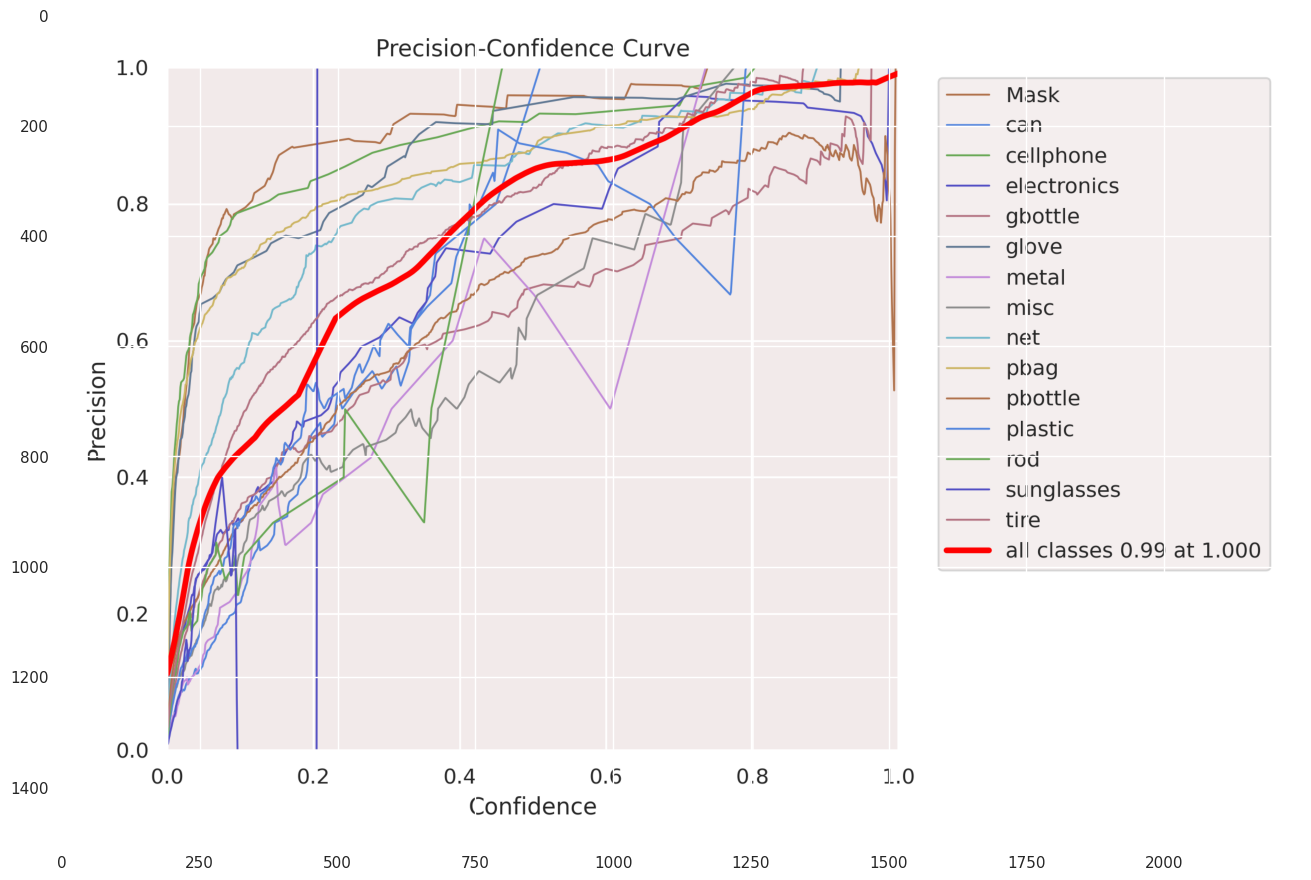

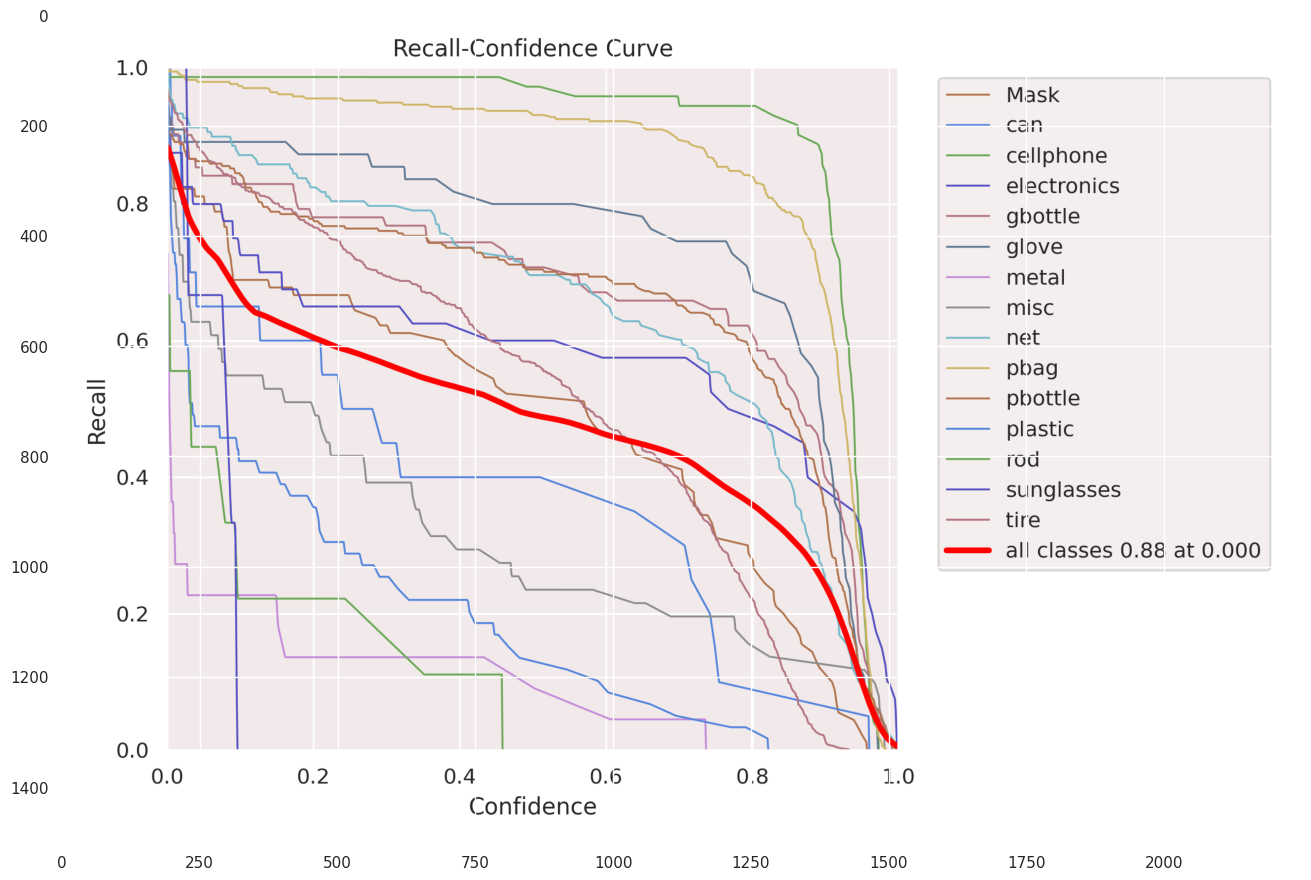

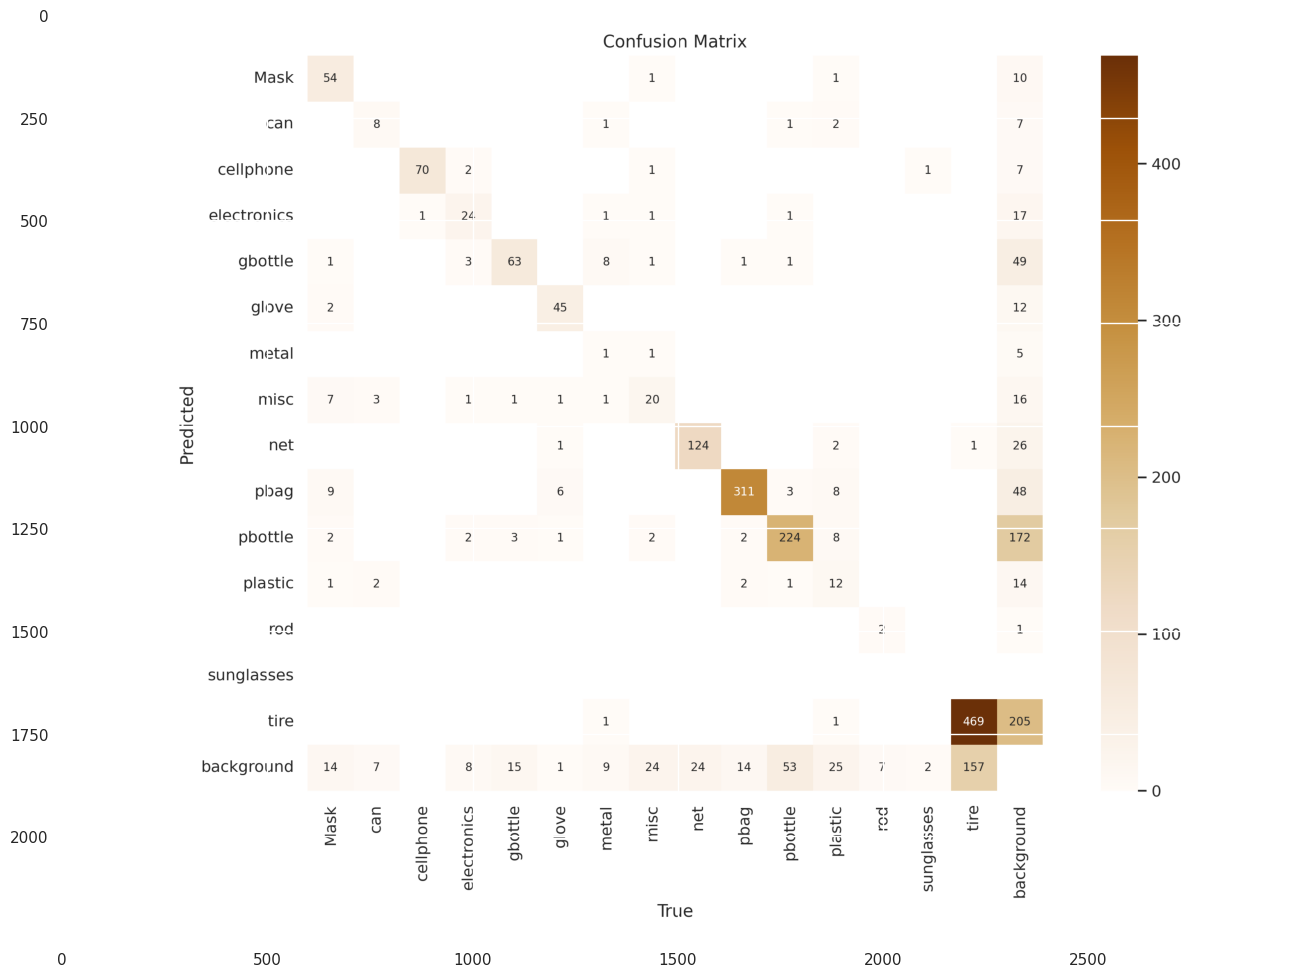

In [7]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]
for i in list_of_metrics:
    img = cv2.imread(f"/kaggle/working/runs/detect/train/{i}")
    plt.figure(figsize = (16, 12))
    plt.imshow(np.array(img))
    plt.show()

In [8]:
results = pd.read_csv("/kaggle/working/runs/detect/train/results.csv")
results.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,56.7032,1.46179,3.36818,1.62059,0.65229,0.17894,0.18597,0.11798,1.44444,2.59719,1.79492,0.000175,0.000175,0.000175
1,2,106.4360,1.44238,2.56170,1.59726,0.65058,0.21245,0.23368,0.14305,1.49627,2.35543,1.80717,0.000336,0.000336,0.000336
2,3,155.1440,1.44515,2.30900,1.57313,0.55789,0.23342,0.22047,0.13330,1.52701,2.30203,1.87859,0.000484,0.000484,0.000484
3,4,203.6290,1.43414,2.14922,1.56013,0.57606,0.30264,0.28487,0.17592,1.46780,2.01906,1.76016,0.000464,0.000464,0.000464
4,5,251.9550,1.40928,2.02999,1.54396,0.68114,0.29695,0.32386,0.20108,1.45876,2.02779,1.77129,0.000443,0.000443,0.000443


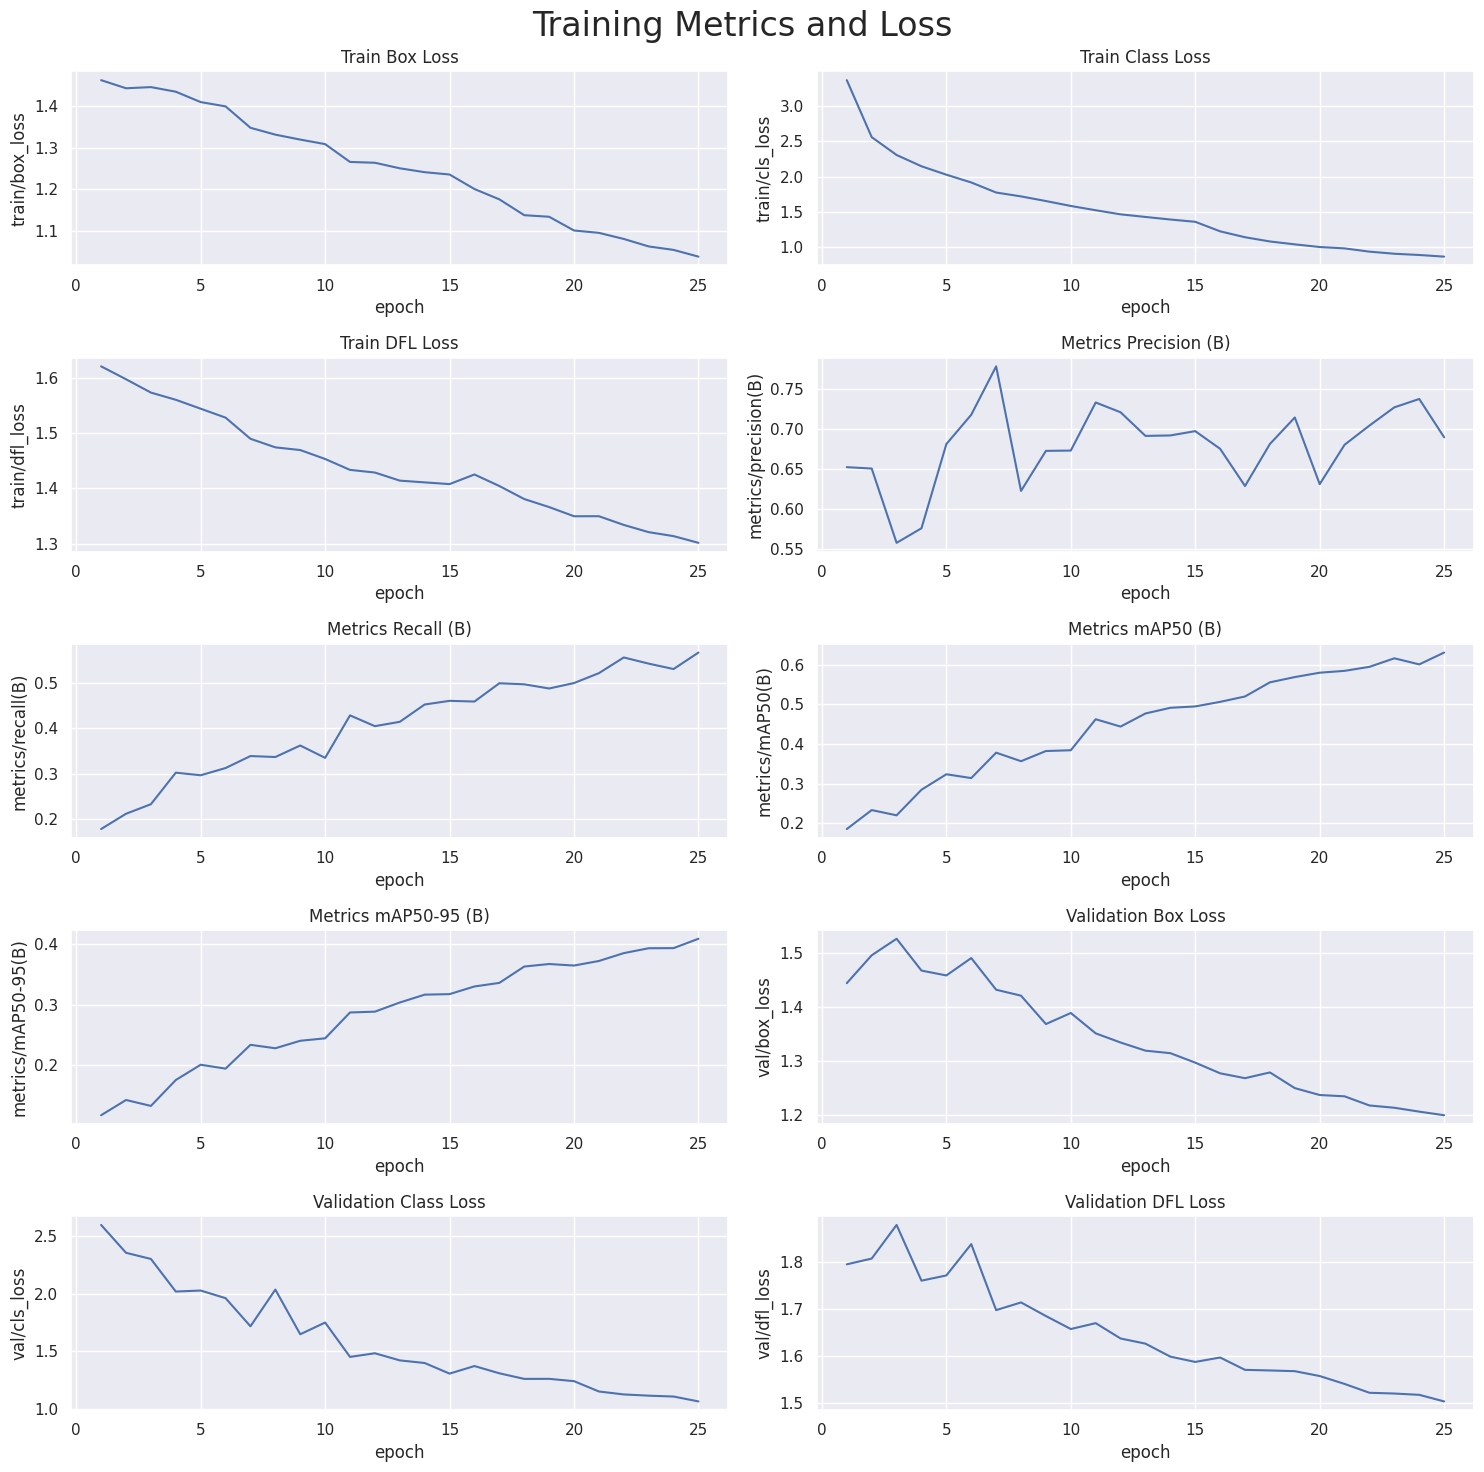

In [9]:
results.columns = results.columns.str.strip()
# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=results, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=results, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=results, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=results, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=results, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=results, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=results, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=results, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=results, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=results, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

# Evaluation of fine-tuned model

In [10]:
# Loading the best performing model
Valid_model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Evaluating the model on the testset
metrics = Valid_model.val(split = 'test')

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8n summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/labels... 501 images, 0 backgrounds, 0 corrupt: 100%|██████████| 501/501 [00:02<00:00, 233.53it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.42it/s]


                   all        501        966      0.653      0.631      0.672      0.415
                  Mask         33         37      0.878      0.703      0.874      0.634
                   can         13         19      0.816      0.469       0.49       0.23
             cellphone         40         46      0.905          1      0.995      0.812
           electronics         14         19      0.486      0.789      0.785      0.449
               gbottle         27         63      0.701      0.635      0.675      0.386
                 glove         23         34       0.88      0.647      0.758      0.619
                 metal          2          5          0          0     0.0283     0.0163
                  misc         30         33      0.625      0.394      0.472      0.243
                   net         63         65      0.709      0.786      0.819      0.515
                  pbag        128        166      0.754      0.964      0.953      0.797
               pbottl

In [11]:
# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.6531209383552871
metrics/recall(B):  0.630617647209719
metrics/mAP50(B):  0.6720582973888198
metrics/mAP50-95(B):  0.41483038154774904


# Visual inspection and use of fine-tund YOLOv8 first-hand


image 1/1 /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/images/uwg_g-586_jpg.rf.4713512a7ec046e7b92b8cc249e27698.jpg: 640x640 1 pbag, 7.9ms
Speed: 3.3ms preprocess, 7.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


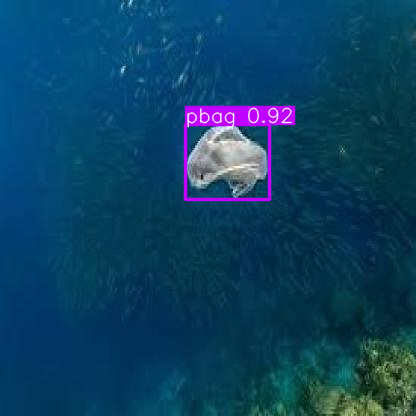


image 1/1 /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/images/uwg_yt-67__flipv_jpg.rf.5116738243538b4e1bf78aaa4e7e8a5a.jpg: 640x640 1 gbottle, 5.5ms
Speed: 2.3ms preprocess, 5.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


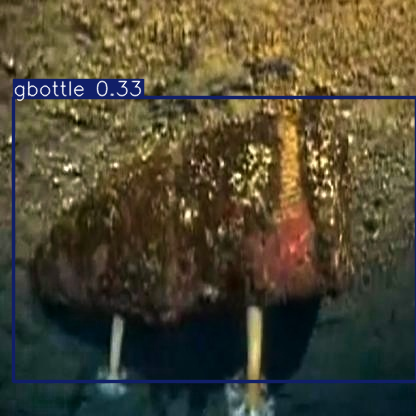


image 1/1 /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/images/mask_in_the_ocean27_jpg.rf.b07f4e441e732918725cedb195537777.jpg: 640x640 1 Mask, 1 glove, 5.6ms
Speed: 3.0ms preprocess, 5.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


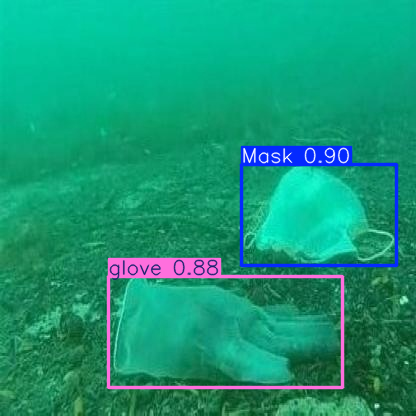


image 1/1 /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/images/uwg_g-256__flipv_jpeg_jpg.rf.3ec4361dbaee73f6ecc417bfc687e4e1.jpg: 640x640 1 gbottle, 6.0ms
Speed: 2.5ms preprocess, 6.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


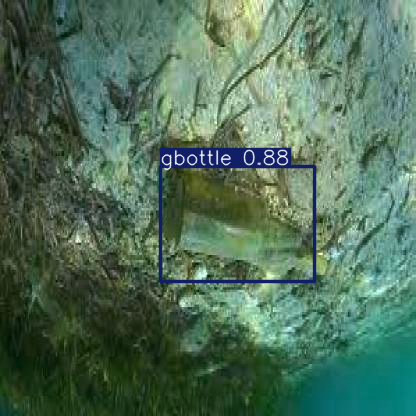


image 1/1 /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/images/uwg_g-1204_jpg.rf.964e8c3cd8d52d79201bfd01bbcf4347.jpg: 640x640 3 tires, 5.7ms
Speed: 2.1ms preprocess, 5.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


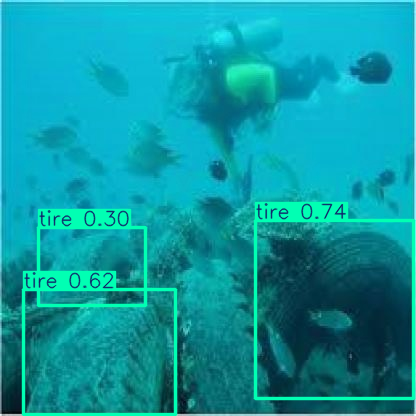

In [12]:
images = os.listdir("/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/images")
for i in range(5):
    image = os.path.join("/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/images", images[i])
    result_predict = Valid_model.predict(source = image, imgsz=(640), iou=0.4)

    # show results
    plot = result_predict[0].plot()
    plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(plot))